#**MapReduce**
MapReduce is a framework that is used to process big data on parallel clusters of hardware in an efficient manner.

As the name suggests, MapReduce consists of two stages –

1. Map stage:
In the Map stage, the mapper job processes the input data. This input data is stored on Hadoop File System (HDFS). The mapper function basically ‘maps’ the input file line-by-line and process small chunks of the data.

2. Reduce stage:
The Reduce stage is a combination of shuffling and reducing. The output of the map stage becomes the input of the reduce stage. The output of the Reduce stage is the final output stored on HDFS.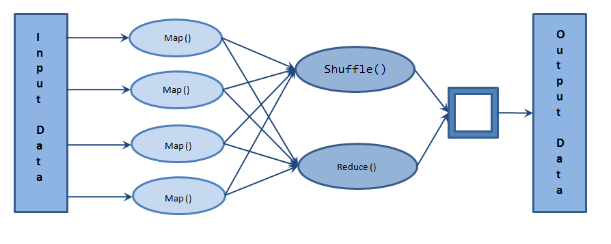

Python has a built-in `map` function. The `map`(func, seq) Python function applies the function func to all the elements of the sequence seq. It returns a new list with the elements changed by func. 

In [6]:
def f(x):
    return x * x


rdd = [2, 6, -3, 7]
res = map(f, rdd)
res  # Res is an iterator

In [7]:
print(*res)

4 36 9 49


In [8]:
from operator import mul

rdd1, rdd2 = [2, 6, -3, 7], [1, -4, 5, 3]
res = map(mul, rdd1, rdd2)  # element wise sum of rdd1 and rdd2

In [9]:
print(*res)

2 -24 -15 21


In [12]:
my_list = [2.6743, 3.63526, 4.2325, 5.9687967, 6.3265, 7.6988, 8.232, 9.6907]
updated_list = map(round, my_list)
print(updated_list)
print(list(updated_list))

[3, 4, 4, 6, 6, 8, 8, 10]


#functools.reduce example
The reduce(fun,seq) function is used to apply a particular function passed in its argument to all of the list elements mentioned in the sequence passed along.This function is defined in “functools” module.


In [13]:
from functools import reduce
from operator import add

rdd = list(range(1, 6))
print(rdd)
reduce(add, rdd)  # computes ((((1+2)+3)+4)+5)

[1, 2, 3, 4, 5]


15

In [14]:
lis = [1, 3, 5, 6, 2, ]
print("The sum of the list elements is : ", end="")
print(reduce(lambda a, b: a + b, lis))

The sum of the list elements is : 17


In [15]:
print("The maximum element of the list is : ", end="")
print(reduce(lambda a, b: a if a > b else b, lis))

The maximum element of the list is : 6


## Weighted mean and Variance

If the generator of random variable $X$ is discrete with probability mass function $x_1 \mapsto p_1, x_2 \mapsto p_2, \ldots, x_n \mapsto p_n$ then

$$\operatorname{Var}(X) = \left(\sum_{i=1}^n p_i x_i ^2\right) - \mu^2,$$

where $\mu$ is the average value, i.e.

$$\mu = \sum_{i=1}^n p_i x_i. $$

In [16]:
X = [5, 1, 2, 3, 1, 2, 5, 4]
P = [0.05, 0.05, 0.15, 0.05, 0.15, 0.2, 0.1, 0.25]

**Challenge 1: Write functions to compute the average value and variance using for loops.**

In [30]:
def average(x, p):
    avg = 0
    for i, v in enumerate(x):
        avg += v * p[i]
    return avg


def variance(x, p):
    avg_sqr = average(x, p) ** 2
    m = 0
    for i, v in enumerate(x):
        m += v ** 2 * p[i]
    return m - avg_sqr


print(average(X, P))
print(variance(X, P))

2.8
1.9600000000000017


**Challenge 2: Write functions to compute the average value and variance using `map` and `reduce`.**

In [34]:
def average2(x, p):
    mult = map(mul, x, p)
    return reduce(add, mult)


def variance2(x, p):
    avg_sqr = average2(x, p) ** 2
    mult = map(multiply_p_and_x_sqr, x, p)
    return reduce(add, mult) - avg_sqr


def multiply_p_and_x_sqr(x, p):
    return x ** 2 * p


print(average2(X, P))
print(variance2(X, P))

2.8
1.9600000000000017


#**Word Count Exercise**
The `map` process takes text files as input and breaks it into words. The `reduce` process sums the counts for each word and emits a single key/value with the word and sum. **Please use the IHaveADream TXT document in the Lecture 8 Slides reading within the Coursework Folder.**

**Challenge 3: Write a function named mapper with a single file name as input that returns a sorted sequence of tuples (word, 1) values.**

In [16]:
import string


def mapper(filename):
    file = open(filename)  # open the file
    data = file.read()  # push the file content into the data variable
    words = data.split()  # break the content into an array of sentences
    file.close()  # close the file

    wordfreq = []
    for word in words:
        word = word.strip(string.punctuation)
        wordfreq.append((word.lower(), 1))  # convert to lowercase to prevent same word from repeating

    return sorted(wordfreq, key=lambda x: x[0], reverse=True)


pairs = mapper('IHaveADream.txt')

**Challenge 4: Create a function named partitioner that stores the key/value pairs from mapper that group (word, 1) pairs into a list as:**

In [17]:
def partitioner():
    frequencies = {}
    for pair in pairs:
        frequencies.setdefault(pair[0], []).append(pair[1])

    frequencies_keys = frequencies.keys()
    frequencies_values = frequencies.values()
    return zip(frequencies_keys, frequencies_values)


print(*partitioner())

('your', [1]) ('you', [1, 1, 1, 1, 1, 1, 1, 1]) ('york', [1, 1]) ('yes', [1]) ('years', [1, 1, 1, 1, 1]) ('wrote', [1]) ('wrongful', [1]) ('would', [1, 1]) ('work', [1, 1]) ('words', [1, 1, 1]) ('withering', [1]) ('with', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) ('winds', [1]) ('will', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) ('whose', [1]) ('who', [1, 1, 1, 1]) ('whites', [1]) ('white', [1, 1, 1, 1, 1, 1]) ('whirlwinds', [1]) ('which', [1, 1, 1, 1, 1]) ('where', [1, 1, 1]) ('when', [1, 1, 1, 1, 1, 1, 1]) ('what', [1]) ('were', [1]) ('well', [1]) ("we've", [1, 1, 1]) ('we', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) ('waters', [1]) ('was', [1, 1]) ('warm', [1]) ('wallow', [1]) ('walk', [1, 1]) ('vote', [1, 1]) ('violence', [1]) ('village', [1]) ('victim', [1]) ('vicious', [1]) ('veterans', [1]) ('vaults', [1]) ('vast', [1]) ('valley', [1, 1, 1]) ('usual', [1]) ('us', [1, 1, 1, 1]) ('urge

**Challenge 5: Write the function named reducer that read a tuple (word,[1,1,1,..,1]) and sum the occurrences of word to a final count, and then output the tuple (word,occurences).**

In [18]:
def reducer(tuple_value):
    return tuple_value[0], sum(tuple_value[1])

In [20]:
final = []

for a in partitioner():
    final.append(reducer(a))

print(sorted(final, key=lambda x: x[1], reverse=True))

[('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), ('be', 33), ('we', 30), ('will', 27), ('that', 24), ('is', 23), ('in', 22), ('this', 20), ('freedom', 20), ('as', 20), ('from', 18), ('our', 17), ('have', 17), ('with', 16), ('i', 15), ('one', 13), ('not', 13), ('negro', 13), ('let', 13), ('ring', 12), ('day', 12), ('dream', 11), ('nation', 10), ('every', 10), ('come', 10), ('today', 9), ('go', 9), ('for', 9), ('back', 9), ('you', 8), ('their', 8), ('satisfied', 8), ('must', 8), ('justice', 8), ('by', 8), ('are', 8), ('able', 8), ('when', 7), ('all', 7), ('white', 6), ('together', 6), ('there', 6), ('now', 6), ('men', 6), ('long', 6), ('it', 6), ('cannot', 6), ('but', 6), ('years', 5), ('which', 5), ('time', 5), ('shall', 5), ('on', 5), ('new', 5), ('my', 5), ('has', 5), ('great', 5), ('free', 5), ('faith', 5), ('children', 5), ('check', 5), ('america', 5), ('who', 4), ('us', 4), ('up', 4), ('until', 4), ('still', 4), ('so', 4), ('mountain', 4), ('mississippi', 4), ('later'